In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('data/daily_mean/daily_mean_pm25_by_stations.csv')
train, test = train_test_split(df, test_size=0.2, random_state=50)

In [15]:
train.to_csv('daily_mean_pm25_80.csv', index=False)
test.to_csv('daily_mean_pm25_20.csv', index=False)

In [19]:
df = pd.read_csv('data/hourly/pm25_by_stations.csv')

In [20]:
df

,year,month,day,hour,Gucheng,Huairou,Tiantan,Changping,Guanyuan,Nongzhanguan,Wanliu,Dongsi,Wanshouxigong,Aotizhongxin,Dingling,Shunyi
0,2013,3,1,0,6.0,7.0,6.0,3.0,4.0,5.0,8.0,9.0,9.0,4.0,4.0,3.0
1,2013,3,1,1,6.0,4.0,6.0,3.0,4.0,8.0,9.0,4.0,11.0,8.0,7.0,12.0
2,2013,3,1,2,5.0,4.0,6.0,3.0,3.0,3.0,3.0,7.0,8.0,7.0,5.0,14.0
3,2013,3,1,3,6.0,3.0,6.0,3.0,3.0,5.0,11.0,3.0,8.0,6.0,6.0,12.0
4,2013,3,1,4,5.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,8.0,3.0,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,14.0,16.0,20.0,28.0,13.0,14.0,11.0,16.0,11.0,12.0,11.0,27.0
35060,2017,2,28,20,27.0,21.0,11.0,12.0,20.0,18.0,15.0,18.0,13.0,13.0,13.0,47.0
35061,2017,2,28,21,22.0,17.0,18.0,7.0,16.0,15.0,13.0,23.0,14.0,16.0,9.0,18.0
35062,2017,2,28,22,9.0,11.0,15.0,11.0,11.0,11.0,12.0,23.0,12.0,21.0,10.0,18.0


In [21]:

for station in df.columns[4:]:
    df[station] = pd.cut(df[station], bins=[0.0, 12.0, 35.4, 55.4, 150.4, 250.4, 500], labels=[0,1,2,3,4,5])

In [24]:
df = df.fillna(0)
df.to_csv('hourly_data.csv', index = False)

In [11]:
daily.to_csv('daily_mean_pm25_by_stations.csv', index=False)

In [115]:
df = pd.read_csv('pm25_by_stations.csv')
stations = df.iloc[:, 4:]
for i in range(12):
    print(stations.iloc[:, i].describe())

count    34418.000000
mean        83.852089
std         82.796445
min          2.000000
25%         24.000000
50%         60.000000
75%        115.750000
max        770.000000
Name: Gucheng, dtype: float64
count    34111.000000
mean        69.626367
std         71.224916
min          2.000000
25%         17.000000
50%         47.000000
75%         98.000000
max        762.000000
Name: Huairou, dtype: float64
count    34387.000000
mean        82.164911
std         80.921384
min          3.000000
25%         22.000000
50%         59.000000
75%        113.000000
max        821.000000
Name: Tiantan, dtype: float64
count    34290.000000
mean        71.099743
std         72.326926
min          2.000000
25%         18.000000
50%         46.000000
75%        100.000000
max        882.000000
Name: Changping, dtype: float64
count    34448.000000
mean        82.933372
std         80.933497
min          2.000000
25%         23.000000
50%         59.000000
75%        115.000000
max        680.00000

In [119]:
def classify_pm25(x):
    if x < 25:
        return 0
    elif x < 55:
        return 1
    elif x < 110:
        return 2
    else:
        return 3

In [123]:
stations = df.columns[4:]

In [125]:
for station in stations:
    df[station] = df[station].apply(classify_pm25)

In [127]:
df.to_csv('classified_pm25_by_station.csv', index = False)

In [4]:
df1 = pd.read_csv('data/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')


In [67]:
import pandas as pd
import os

# Create an empty DataFrame to store the concatenated data
concatenated_data = pd.DataFrame()

# Path to the folder containing the files
folder_path = 'data/PRSA_Data_20130301-20170228'

# Get the list of file names in the folder
file_names = os.listdir(folder_path)

# Iterate over the files and concatenate them
for file_name in file_names:
    # Check if the file is a CSV file (you can modify the condition based on your file type)
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        
        # Read the file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Concatenate the current file's data with the previous data
        concatenated_data = pd.concat([concatenated_data, df])

# Reset the index of the concatenated data
concatenated_data.reset_index(drop=True, inplace=True)

# Print the concatenated data
print(concatenated_data)


           No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0           1  2013      3    1     0    6.0  18.0   5.0   NaN   800.0  88.0   
1           2  2013      3    1     1    6.0  15.0   5.0   NaN   800.0  88.0   
2           3  2013      3    1     2    5.0  18.0   NaN   NaN   700.0  52.0   
3           4  2013      3    1     3    6.0  20.0   6.0   NaN     NaN   NaN   
4           5  2013      3    1     4    5.0  17.0   5.0   NaN   600.0  73.0   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
420763  35060  2017      2   28    19   27.0  72.0   8.0  92.0   800.0  16.0   
420764  35061  2017      2   28    20   47.0  55.0  17.0  86.0  1100.0  19.0   
420765  35062  2017      2   28    21   18.0  28.0   4.0  30.0   500.0  64.0   
420766  35063  2017      2   28    22   18.0  20.0   9.0  33.0   500.0  59.0   
420767  35064  2017      2   28    23   15.0  22.0  13.0  34.0   500.0  60.0   

        TEMP    PRES  DEWP  RAIN   wd  

In [3]:
concatenated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [68]:
stations = concatenated_data['station'].unique()

In [97]:
by_stations = [concatenated_data[concatenated_data['station'] == station][['PM2.5', 'station']].reset_index(drop = True) for station in stations]
by_stations

[       PM2.5  station
 0        6.0  Gucheng
 1        6.0  Gucheng
 2        5.0  Gucheng
 3        6.0  Gucheng
 4        5.0  Gucheng
 ...      ...      ...
 35059   14.0  Gucheng
 35060   27.0  Gucheng
 35061   22.0  Gucheng
 35062    9.0  Gucheng
 35063   12.0  Gucheng
 
 [35064 rows x 2 columns],
        PM2.5  station
 0        7.0  Huairou
 1        4.0  Huairou
 2        4.0  Huairou
 3        3.0  Huairou
 4        3.0  Huairou
 ...      ...      ...
 35059   16.0  Huairou
 35060   21.0  Huairou
 35061   17.0  Huairou
 35062   11.0  Huairou
 35063   11.0  Huairou
 
 [35064 rows x 2 columns],
        PM2.5  station
 0        6.0  Tiantan
 1        6.0  Tiantan
 2        6.0  Tiantan
 3        6.0  Tiantan
 4        5.0  Tiantan
 ...      ...      ...
 35059   20.0  Tiantan
 35060   11.0  Tiantan
 35061   18.0  Tiantan
 35062   15.0  Tiantan
 35063   15.0  Tiantan
 
 [35064 rows x 2 columns],
        PM2.5    station
 0        3.0  Changping
 1        3.0  Changping
 2        

In [101]:
pm25_by_stations = pd.DataFrame(columns=stations)

In [103]:
for i in range(len(stations)):
    pm25_by_stations[stations[i]] = by_stations[i]['PM2.5']

In [107]:
pm25_by_stations_df = pd.concat([concatenated_data[concatenated_data['station'] == 'Gucheng'][['year', 'month', 'day', 'hour']], pm25_by_stations],axis = 1)

In [108]:
pm25_by_stations_df.to_csv('pm25_by_stations.csv', index = False)

In [40]:
pm25 = concatenated_data[['year', 'PM2.5', 'station']]
grouped = pm25.groupby(['station', 'year'], as_index=False).sum()
by_station = [grouped.iloc[i:i+5, :] for i in range(0,60,5)]

In [22]:
pm25

,year,PM2.5,station
0,2013,6.0,Gucheng
1,2013,6.0,Gucheng
2,2013,5.0,Gucheng
3,2013,6.0,Gucheng
4,2013,5.0,Gucheng
...,...,...,...
420763,2017,27.0,Shunyi
420764,2017,47.0,Shunyi
420765,2017,18.0,Shunyi
420766,2017,18.0,Shunyi


In [20]:
for station in by_station:
    print(station)

        station  year     PM2.5
0  Aotizhongxin  2013  604184.0
1  Aotizhongxin  2014  749521.5
2  Aotizhongxin  2015  701619.8
3  Aotizhongxin  2016  637816.0
4  Aotizhongxin  2017  132667.0
     station  year     PM2.5
5  Changping  2013  531104.0
6  Changping  2014  673324.3
7  Changping  2015  586722.9
8  Changping  2016  534557.0
9  Changping  2017  112302.0
     station  year     PM2.5
10  Dingling  2013  466883.0
11  Dingling  2014  633214.6
12  Dingling  2015  558944.3
13  Dingling  2016  507218.0
14  Dingling  2017   96190.0
   station  year     PM2.5
15  Dongsi  2013  626057.0
16  Dongsi  2014  757749.2
17  Dongsi  2015  754032.9
18  Dongsi  2016  676385.0
19  Dongsi  2017  143447.0
     station  year     PM2.5
20  Guanyuan  2013  594781.0
21  Guanyuan  2014  756201.8
22  Guanyuan  2015  712286.0
23  Guanyuan  2016  666765.0
24  Guanyuan  2017  126855.0
    station  year     PM2.5
25  Gucheng  2013  591062.0
26  Gucheng  2014  765855.3
27  Gucheng  2015  718689.9
28  Gucheng 

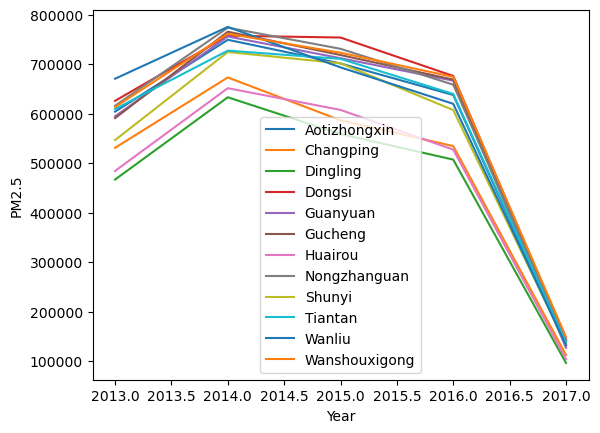

In [21]:
for station in by_station:
    plt.plot(station['year'], station['PM2.5'], label = station.iloc[0,0])
plt.legend()
plt.xlabel('Year')
plt.ylabel('PM2.5')
plt.show()